In [3]:
%matplotlib inline

In [2]:
import numpy as np 
import pandas as pd 
from geostatsmodels import utilities, kriging, variograms, model, geoplot


In [5]:
import matplotlib.pyplot as plt
from scipy.stats import norm 
import urllib2
import os.path 
import zipfile 
import StringIO


In [8]:

clusterfile = 'ZoneA.dat'

z = open(clusterfile,'r' ).readlines()
z = [ i.strip().split() for i in z[10:] ]
z = np.array( z, dtype=np.float )
z = pd.DataFrame( z, columns=['x','y','thk','por','perm','lperm','lpermp','lpermr'] )
P = np.array( z[['x','y','por']] )

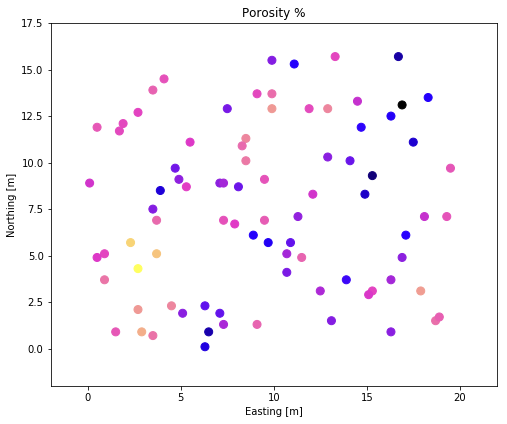

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
cmap = geoplot.YPcmap
ax.scatter( z.x/1000, z.y/1000, c=z.por, s=64,cmap=cmap)
ax.set_aspect(1)
plt.xlim(-2,22)
plt.ylim(-2,17.5)

plt.xlabel('Easting [m]')
plt.ylabel('Northing [m]')
th=plt.title('Porosity %')

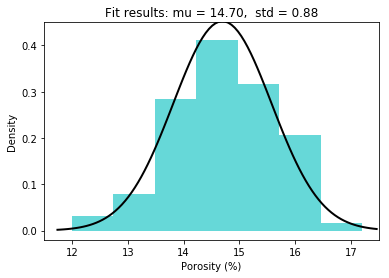

In [10]:
hrange = (12,17.2)
mu, std = norm.fit(z.por)
ahist=plt.hist(z.por, bins=7, normed=True, alpha=0.6, color='c',range=hrange)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
th=plt.title(title)
xh=plt.xlabel('Porosity (%)')
yh=plt.ylabel('Density')
xl=plt.xlim(11.5,17.5)
yl=plt.ylim(-0.02,0.45)

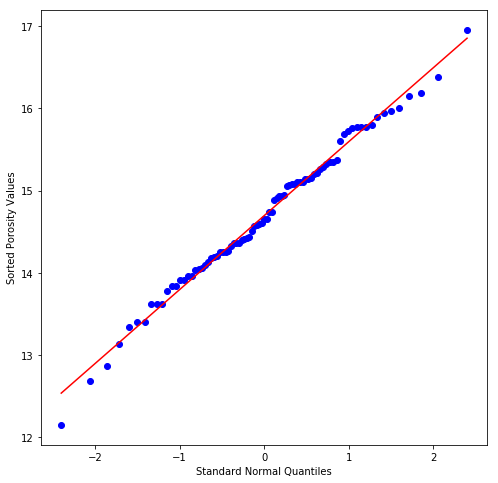

In [11]:
import scipy.stats as stats
qqdata = stats.probplot(z.por, dist="norm",plot=plt,fit=False)
xh=plt.xlabel('Standard Normal Quantiles')
yh=plt.ylabel('Sorted Porosity Values')
fig=plt.gcf()
fig.set_size_inches(8,8)
th=plt.title('')

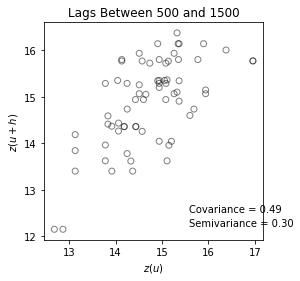

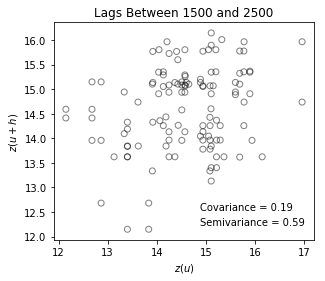

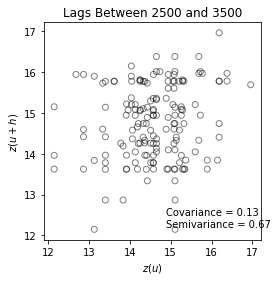

In [12]:
pw = utilities.pairwise(P)
geoplot.hscattergram(P,pw,1000,500)
geoplot.hscattergram(P,pw,2000,500)
geoplot.hscattergram(P,pw,3000,500)

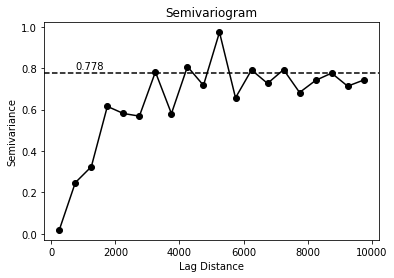

In [13]:
tolerance = 250
lags = np.arange( tolerance, 10000, tolerance*2 )
sill = np.var(P[:,2])

geoplot.semivariogram( P, lags, tolerance )

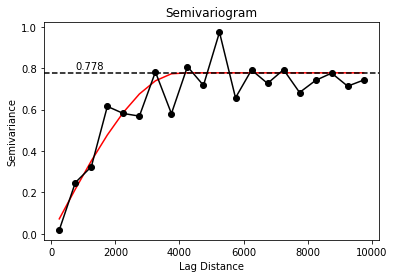

In [14]:
svm = model.semivariance( model.spherical, [ 4000, sill ] )
geoplot.semivariogram( P, lags, tolerance, model=svm )

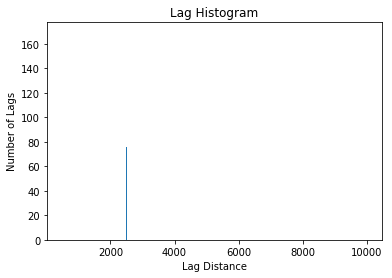

In [15]:
geoplot.laghistogram( P, pw, lags, tolerance )


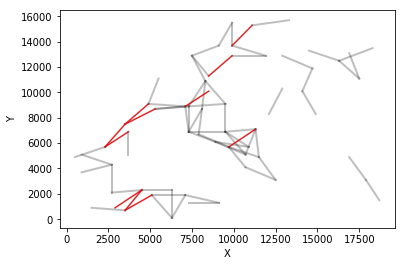

In [16]:
geoplot.anisotropiclags( P, pw, lag=2000, tol=250, angle=45, atol=15 )

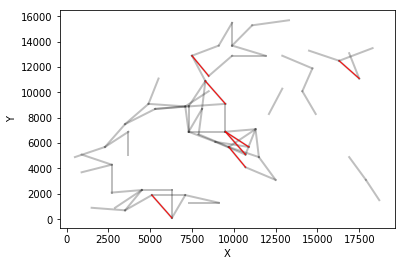

In [17]:
geoplot.anisotropiclags( P, pw, lag=2000, tol=250, angle=135, atol=15 )

C:\Users\obada\Anaconda3\envs\mypython\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\obada\Anaconda3\envs\mypython\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\obada\Anaconda3\envs\mypython\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


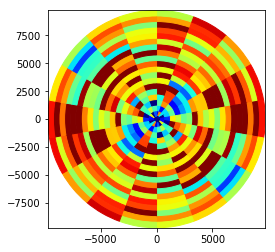

In [18]:
geoplot.polaranisotropy( P, pw, lags, tolerance, nsectors=18 )

In [ ]:
imp